# <center>Organizaci&oacute;n de Datos</center>
#### <center>C&aacute;tedra Ing. Rodriguez, Juan Manuel </center>
## <center>Trabajo Práctico 1 : Reservas de Hotel </center>
#### Grupo 29:
* Alen Davies Leccese - 107084
* Luca Lazcano - 107044
* Nicolas Tonizzo - 107280

#### Imports y configs

Importamos las librerias y creamos el dataframe

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
from matplotlib import pyplot as plt

df = pd.read_csv('./Datasets/hotels_train.csv')
df.drop(columns=['reservation_status_date'], inplace=True)

hotel = df.copy()

## Análisis Exploratorio y Preprocesamiento de Datos

### **Exploración inicial**

#### Primera aproximación a los datos

Primero vemos cómo están organizados los datos, imprimiendo algunas filas:

In [266]:
hotel.sample(5)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
55760,Resort Hotel,245,2017,August,33,17,2,4,2,0.0,...,No Deposit,240.0,NaN,0,Transient,222.00,0,2,d494a6e3-52e0-4561-ab74-a23e9a0d5fd1,1
57245,City Hotel,25,2016,February,7,7,2,2,2,0.0,...,No Deposit,11.0,NaN,0,Transient,64.64,0,0,91eabeb9-283b-4b0c-a6aa-34794420b792,0
22199,City Hotel,67,2016,July,29,12,0,4,3,0.0,...,No Deposit,9.0,NaN,0,Transient,139.50,0,0,fa6ff29e-b082-495e-9c89-c2bdf73a4420,0
14948,City Hotel,79,2016,April,16,15,0,2,2,0.0,...,No Deposit,9.0,NaN,0,Transient-Party,96.30,0,1,358d5940-346d-4dbe-8275-b45718aa1bb0,0
15235,Resort Hotel,80,2015,September,40,28,1,3,2,0.0,...,No Deposit,240.0,NaN,0,Transient,69.50,0,2,479b16b5-6465-4c43-8e60-dcc9f5a0b545,1


Vemos que el dataset contiene información sobre las reservas en dos hoteles distintos.

In [179]:
hotel.hotel.value_counts()

City Hotel      42129
Resort Hotel    19784
Name: hotel, dtype: int64

Luego vemos el tipo de dato de cada columna y determinamos a qué tipo de variable corresponde, así sabemos el análisis que se le puede efectuar.

In [267]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61913 entries, 0 to 61912
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           61913 non-null  object 
 1   lead_time                       61913 non-null  int64  
 2   arrival_date_year               61913 non-null  int64  
 3   arrival_date_month              61913 non-null  object 
 4   arrival_date_week_number        61913 non-null  int64  
 5   arrival_date_day_of_month       61913 non-null  int64  
 6   stays_in_weekend_nights         61913 non-null  int64  
 7   stays_in_week_nights            61913 non-null  int64  
 8   adults                          61913 non-null  int64  
 9   children                        61909 non-null  float64
 10  babies                          61913 non-null  int64  
 11  meal                            61913 non-null  object 
 12  country                         

Vemos que hay un mix de variables, cualitativas, ordinales y cuantitativas (discretas y continuas). Se observa que están representadas por varios tipos de datos. Por ejemplo algunas que son de tipo numérico, son cualitativas, como por ejemplo 'agent' y 'company'. El número seguramente representa un índice o id. Otras columnas son "booleanas", el valor numérico representa "verdadero" o "falso". Normalmente un 1 en dicha columna será verdadero, y un 0, falso. Estas columnas son 'is_repeated_guest' e 'is_canceled'.

Vemos si hay duplicados en el dataset:

In [181]:
print(f'Cantidad de filas duplicadas: {hotel.duplicated().sum()}')

Cantidad de filas duplicadas: 0


Convertimos las columnas `'arrival_date_year'`, `'arrival_date_month'`, `'arrival_date_day_of_month'` en una sola columna `'arrival_date'` de tipo datetime.

In [182]:
hotel['arrival_date'] = pd.to_datetime(hotel['arrival_date_year'].astype(str) + '-' + hotel['arrival_date_month'] + '-' + hotel['arrival_date_day_of_month'].astype(str))

# hotel.drop(columns=['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month'], inplace=True)

Verificamos que se hayan convertido correctamente:

In [183]:
hotel.arrival_date

0       2016-09-05
1       2015-10-31
2       2016-10-13
3       2016-12-12
4       2017-03-19
           ...    
61908   2017-01-27
61909   2016-09-02
61910   2017-05-08
61911   2015-10-10
61912   2016-04-17
Name: arrival_date, Length: 61913, dtype: datetime64[ns]

In [184]:
hotel.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,arrival_date
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,9.0,NaN,0,Transient,115.5,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1,2016-09-05
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,NaN,NaN,0,Transient,42.0,1,0,b1428f80-c56c-4ae4-91a9-6962edae08b1,0,2015-10-31
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,9.0,NaN,0,Transient,229.0,0,2,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0,2016-10-13
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,...,154.0,NaN,0,Transient,75.0,0,0,314f56dc-2e4d-4298-9bdd-27bb008bffff,1,2016-12-12
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,...,20.0,NaN,0,Transient-Party,75.0,0,1,28c75445-c603-413a-babf-ad377018b592,0,2017-03-19


#### Variables cualitativas

Para las variables cualitativas se pueden determinar los valores posibles, y a qué corresponden.

In [185]:
cualitativas = hotel[['hotel','arrival_date_week_number', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'agent', 'company', 'customer_type', 'is_canceled', 'agent', 'company']]
cualitativas

,hotel,arrival_date_week_number,meal,country,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,deposit_type,agent,company,customer_type,is_canceled,agent,company
0,City Hotel,37,BB,USA,Online TA,TA/TO,0,D,D,No Deposit,9.0,NaN,Transient,1,9.0,NaN
1,Resort Hotel,44,BB,PRT,Groups,Direct,0,A,A,No Deposit,NaN,NaN,Transient,0,NaN,NaN
2,City Hotel,42,BB,CHE,Online TA,TA/TO,0,F,F,No Deposit,9.0,NaN,Transient,0,9.0,NaN
3,City Hotel,51,BB,PRT,Groups,TA/TO,0,A,A,Non Refund,154.0,NaN,Transient,1,154.0,NaN
4,City Hotel,12,BB,FRA,Offline TA/TO,TA/TO,0,A,A,No Deposit,20.0,NaN,Transient-Party,0,20.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61908,Resort Hotel,4,BB,ESP,Online TA,TA/TO,0,A,D,No Deposit,240.0,NaN,Transient,1,240.0,NaN
61909,City Hotel,36,SC,FRA,Online TA,TA/TO,0,A,A,No Deposit,NaN,NaN,Transient,0,NaN,NaN
61910,City Hotel,19,BB,FRA,Aviation,Corporate,0,A,A,No Deposit,NaN,153.0,Transient,0,NaN,153.0
61911,Resort Hotel,41,BB,PRT,Groups,TA/TO,0,A,A,Non Refund,96.0,NaN,Transient,1,96.0,NaN


La variable 'hotel' puede tomar los siguientes valores:

In [186]:
hotel['hotel'].value_counts()

City Hotel      42129
Resort Hotel    19784
Name: hotel, dtype: int64

La variable 'arrival_date_month' puede tomar los siguientes valores:

In [187]:
hotel['arrival_date_month'].value_counts()

August       7176
July         6524
May          6159
April        5878
October      5863
June         5772
September    5619
March        4899
February     4125
December     3493
November     3404
January      3001
Name: arrival_date_month, dtype: int64

La variable 'arrival_date_week_number' puede tomar los siguientes valores:

In [188]:
hotel['arrival_date_week_number'].value_counts().sort_index()


1      552
2      642
3      668
4      733
5      655
6      735
7     1073
8     1170
9     1082
10    1085
11    1028
12     995
13    1257
14    1189
15    1385
16    1250
17    1547
18    1611
19    1196
20    1464
21    1467
22    1370
23    1362
24    1354
25    1412
26    1232
27    1359
28    1490
29    1424
30    1609
31    1397
32    1600
33    1876
34    1533
35    1305
36    1166
37    1166
38    1456
39    1368
40    1271
41    1449
42    1449
43    1224
44    1170
45    1037
46     837
47     788
48     721
49     915
50     781
51     464
52     575
53     969
Name: arrival_date_week_number, dtype: int64

La variable 'meal' puede tomar los siguientes valores:

In [189]:
hotel['meal'].value_counts().sort_index()

BB           47837
FB             477
HB            7452
SC            5556
Undefined      591
Name: meal, dtype: int64

La variable 'country' puede tomar los siguientes valores:

In [190]:
hotel['country'].value_counts()

PRT    27950
GBR     5733
FRA     4809
ESP     4210
DEU     3312
       ...  
ATA        1
GLP        1
PYF        1
IMN        1
MDG        1
Name: country, Length: 149, dtype: int64

La variable 'market_segment' puede tomar los siguientes valores:

In [191]:
hotel['market_segment'].value_counts()


Online TA        29269
Offline TA/TO    12384
Groups           11545
Direct            5757
Corporate         2484
Complementary      359
Aviation           113
Undefined            2
Name: market_segment, dtype: int64

La variable 'distribution_channel' puede tomar los siguientes valores:

In [192]:
hotel['distribution_channel'].value_counts()


TA/TO        51849
Direct        6799
Corporate     3172
GDS             89
Undefined        4
Name: distribution_channel, dtype: int64

La variable 'is_repeated_guest' puede tomar los siguientes valores:

In [193]:
hotel['is_repeated_guest'].value_counts()

0    60180
1     1733
Name: is_repeated_guest, dtype: int64

La variable 'reserved_room_type' puede tomar los siguientes valores:

In [194]:
hotel['reserved_room_type'].value_counts().sort_index()

A    45134
B      580
C      482
D     9585
E     3249
F     1451
G     1090
H      334
L        1
P        7
Name: reserved_room_type, dtype: int64

La variable 'assigned_room_type' puede tomar los siguientes valors:

In [195]:
hotel['assigned_room_type'].value_counts().sort_index()


A    40007
B     1056
C     1127
D    12190
E     3779
F     1821
G     1277
H      384
I      145
K      119
L        1
P        7
Name: assigned_room_type, dtype: int64

La variable 'deposit_type' puede tomar los siguientes valores:

In [196]:
hotel['deposit_type'].value_counts()

No Deposit    51685
Non Refund    10150
Refundable       78
Name: deposit_type, dtype: int64

La variable 'agent' puede tomar los siguientes valores:

In [197]:
hotel['agent'].value_counts()

9.0      17004
240.0     7386
1.0       4424
14.0      1700
6.0       1639
         ...  
141.0        1
304.0        1
370.0        1
476.0        1
391.0        1
Name: agent, Length: 296, dtype: int64

La variable 'company' puede tomar los siguientes valores:

In [198]:
hotel['company'].value_counts()


40.0     390
223.0    364
67.0     169
45.0     118
153.0    106
        ... 
481.0      1
271.0      1
528.0      1
426.0      1
398.0      1
Name: company, Length: 276, dtype: int64

La variable 'customer_type' puede tomar los siguientes valores:

In [199]:
hotel['customer_type'].value_counts()

Transient          47449
Transient-Party    12168
Contract            2033
Group                263
Name: customer_type, dtype: int64

La variable 'is_canceled' puede tomar los siguientes valores:

In [200]:
hotel['is_canceled'].value_counts()


0    30972
1    30941
Name: is_canceled, dtype: int64

#### Variables cuantitativas

Para las variables cuantitativas se pueden calcular las medidas de resumen, "estadísticas", como media, mediana y moda.

In [201]:
cuantitativas = hotel[['lead_time', 'arrival_date_year', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']]
cuantitativas.describe()

,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61909.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000
mean,112.248187,2016.154749,15.785812,0.924135,2.510054,1.862791,0.104896,0.007155,0.027991,0.114790,0.115420,0.195952,2.638977,102.383773,0.049957,0.523703
std,110.717953,0.708389,8.795489,0.993101,1.884926,0.589066,0.402847,0.092158,0.164948,0.993723,1.396359,0.610519,18.619092,47.757640,0.221023,0.775412
min,0.000000,2015.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,23.000000,2016.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,78.000000,2016.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,172.000000,2017.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,629.000000,2017.000000,31.000000,16.000000,40.000000,55.000000,10.000000,9.000000,1.000000,26.000000,70.000000,17.000000,391.000000,510.000000,8.000000,5.000000


#### Variables irrelevantes para el análisis

Para el análisis de los datos podemos considerar que la variable 'id' será irrelevante ya que no aporta información sobre las reservas de los hoteles, es solamente un identificador de cada una.

Además de esta, es difícil determinar qué variable será irrelevante, antes de haberlas analizado y visto cómo se relacionan entre ellas y con el target 'is_canceled'.

In [202]:
hotel.drop(columns=['id'], inplace=True)

#### Análisis gráfico distribuciones de las variables

Analizamos la distribución de todas las variables, tanto cualitativas como cuantitativas.

##### *Variables cualitativas*

Primero analizamos la distribucion de las variables cualitativas:

<AxesSubplot:xlabel='hotel', ylabel='count'>

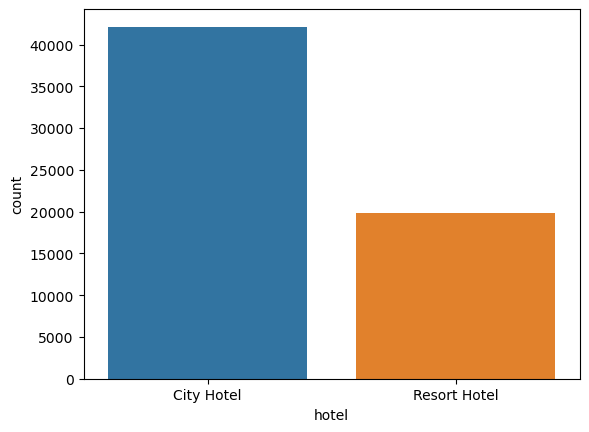

In [203]:
sns.countplot(x='hotel', data=cualitativas)

<AxesSubplot:xlabel='customer_type', ylabel='count'>

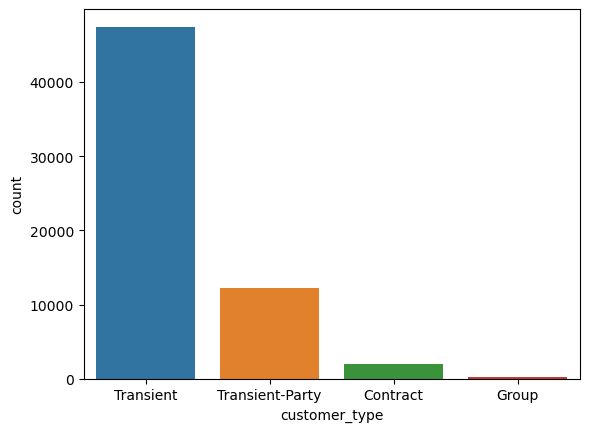

In [204]:
sns.countplot(x='customer_type', data=cualitativas)

<AxesSubplot:xlabel='deposit_type', ylabel='count'>

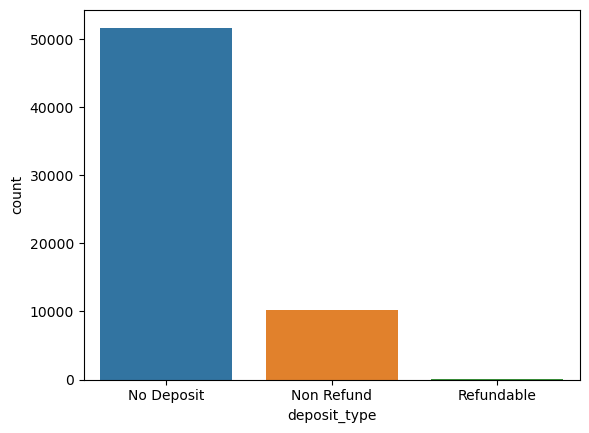

In [205]:
sns.countplot(x='deposit_type', data=cualitativas)

<AxesSubplot:xlabel='distribution_channel', ylabel='count'>

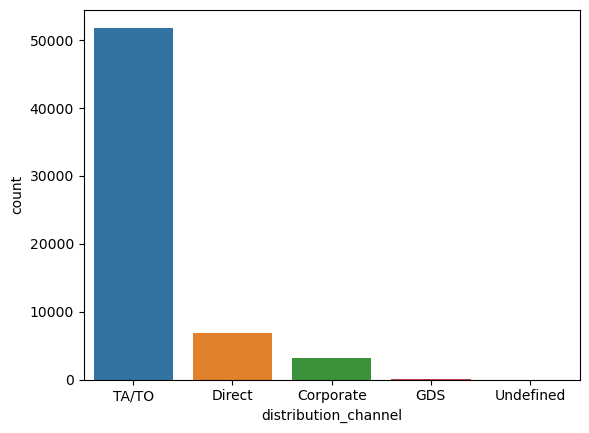

In [206]:
sns.countplot(x='distribution_channel', data=cualitativas)

[Text(0, 0, 'Online TA'),
 Text(1, 0, 'Groups'),
 Text(2, 0, 'Offline TA/TO'),
 Text(3, 0, 'Direct'),
 Text(4, 0, 'Complementary'),
 Text(5, 0, 'Corporate'),
 Text(6, 0, 'Aviation'),
 Text(7, 0, 'Undefined')]

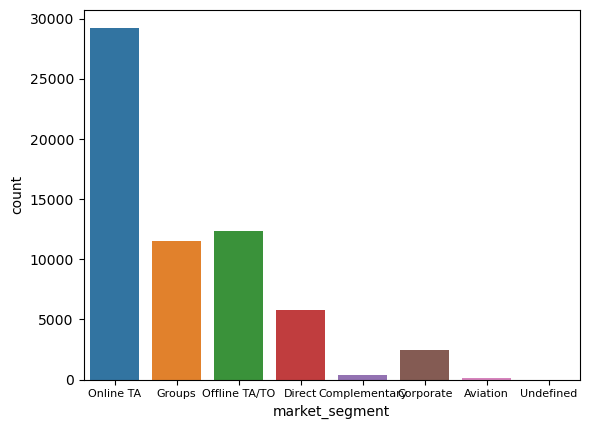

In [207]:
sns.countplot(x='market_segment', data=cualitativas)
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), size=8)

<AxesSubplot:xlabel='count', ylabel='country'>

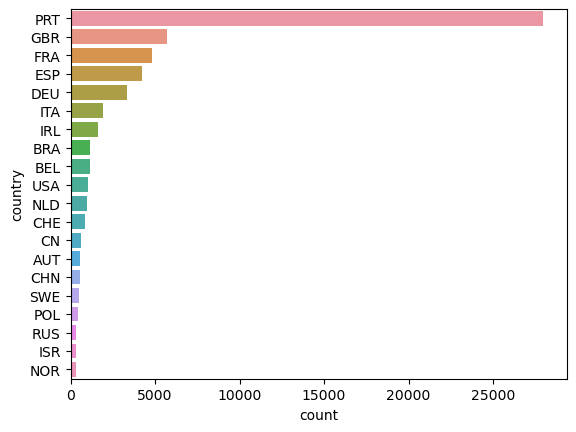

In [208]:
sns.countplot(y='country', data=cualitativas, order=cualitativas['country'].value_counts().iloc[:20].index)

<AxesSubplot:xlabel='value', ylabel='Count'>

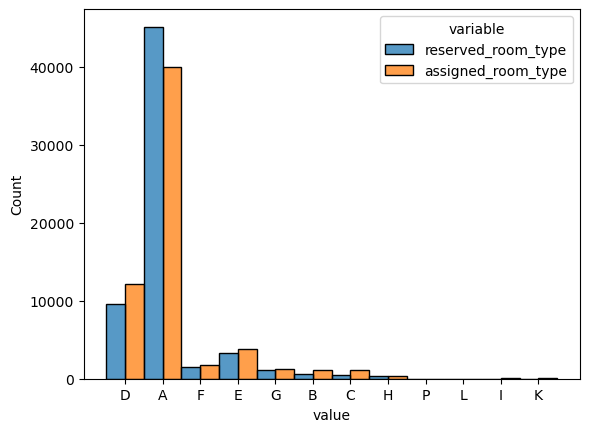

In [209]:
room_types = hotel[['assigned_room_type', 'reserved_room_type']].copy()

room_types_melted = pd.melt(room_types, value_vars=[
                    'reserved_room_type', 'assigned_room_type'])

sns.histplot(data=room_types_melted, x='value',
             hue='variable', binwidth=1, multiple='dodge')

<AxesSubplot:xlabel='is_repeated_guest', ylabel='count'>

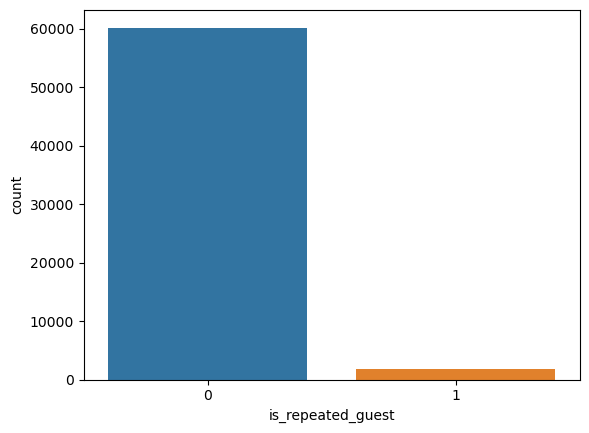

In [210]:
sns.countplot(x='is_repeated_guest', data=cualitativas)

<AxesSubplot:xlabel='meal', ylabel='count'>

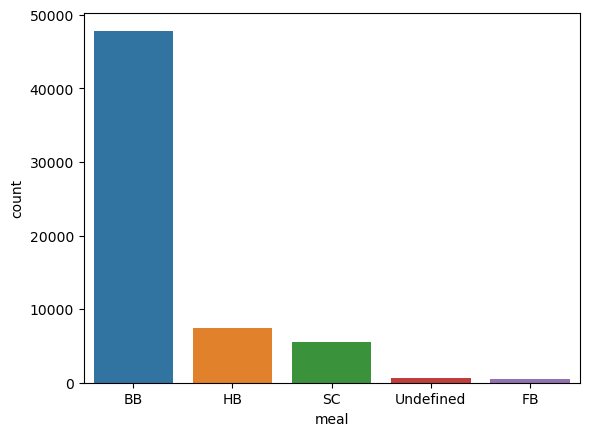

In [211]:
sns.countplot(x='meal', data=cualitativas)

In [212]:
sns.countplot(x='agent', data=cualitativas, order=cualitativas['agent'].value_counts().iloc[:15].index)
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), size=8)

ValueError: Grouper for 'agent' not 1-dimensional

[Text(0, 0, '40.0'),
 Text(1, 0, '223.0'),
 Text(2, 0, '67.0'),
 Text(3, 0, '45.0'),
 Text(4, 0, '153.0'),
 Text(5, 0, '174.0'),
 Text(6, 0, '281.0'),
 Text(7, 0, '219.0'),
 Text(8, 0, '51.0'),
 Text(9, 0, '405.0'),
 Text(10, 0, '154.0'),
 Text(11, 0, '233.0'),
 Text(12, 0, '94.0'),
 Text(13, 0, '348.0'),
 Text(14, 0, '169.0')]

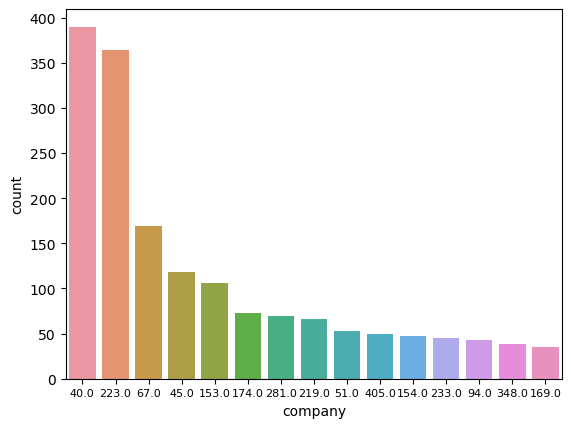

In [ ]:
sns.countplot(x='company', data=cualitativas, order=cualitativas['company'].value_counts().iloc[:15].index)
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), size=8)

<AxesSubplot:xlabel='is_canceled', ylabel='count'>

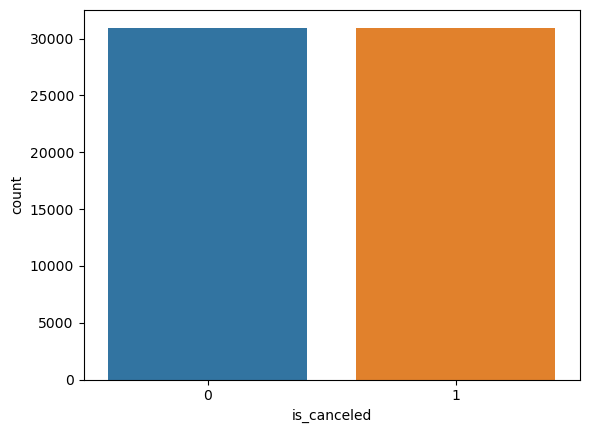

In [ ]:
sns.countplot(x='is_canceled', data=cualitativas)

##### *Variables cuantitativas*

Ahora vemos la distribucion de las variables cuantitativas

<AxesSubplot:xlabel='lead_time', ylabel='Count'>

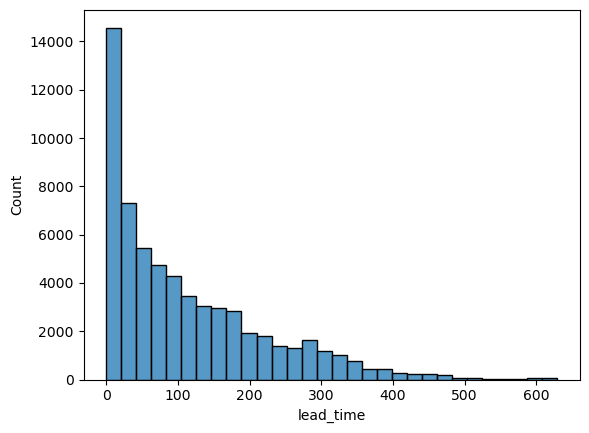

In [ ]:
sns.histplot(hotel['lead_time'], bins=30)

<AxesSubplot:xlabel='arrival_date_year', ylabel='count'>

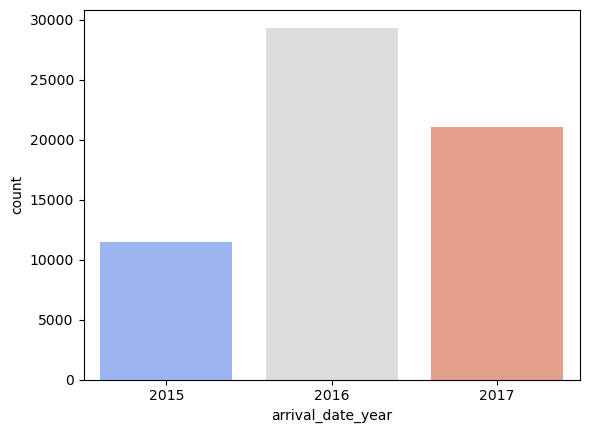

In [ ]:
sns.countplot(x='arrival_date_year', data = cuantitativas, palette='coolwarm')

[Text(0, 0, '1'),
 Text(1, 0, '2'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5'),
 Text(5, 0, '6'),
 Text(6, 0, '7'),
 Text(7, 0, '8'),
 Text(8, 0, '9'),
 Text(9, 0, '10'),
 Text(10, 0, '11'),
 Text(11, 0, '12'),
 Text(12, 0, '13'),
 Text(13, 0, '14'),
 Text(14, 0, '15'),
 Text(15, 0, '16'),
 Text(16, 0, '17'),
 Text(17, 0, '18'),
 Text(18, 0, '19'),
 Text(19, 0, '20'),
 Text(20, 0, '21'),
 Text(21, 0, '22'),
 Text(22, 0, '23'),
 Text(23, 0, '24'),
 Text(24, 0, '25'),
 Text(25, 0, '26'),
 Text(26, 0, '27'),
 Text(27, 0, '28'),
 Text(28, 0, '29'),
 Text(29, 0, '30'),
 Text(30, 0, '31')]

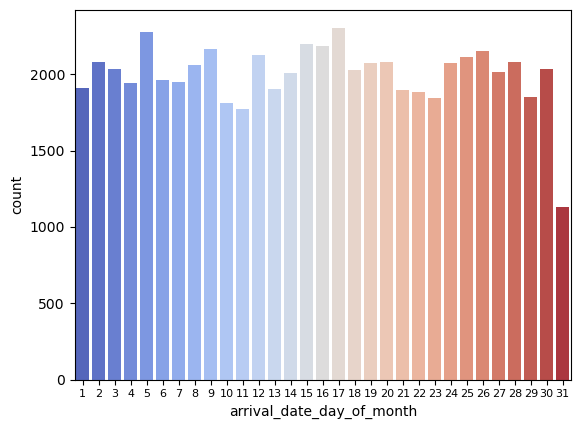

In [ ]:
sns.countplot(x='arrival_date_day_of_month', data = cuantitativas, palette='coolwarm')
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), size=8)

<AxesSubplot:xlabel='stays_in_weekend_nights', ylabel='count'>

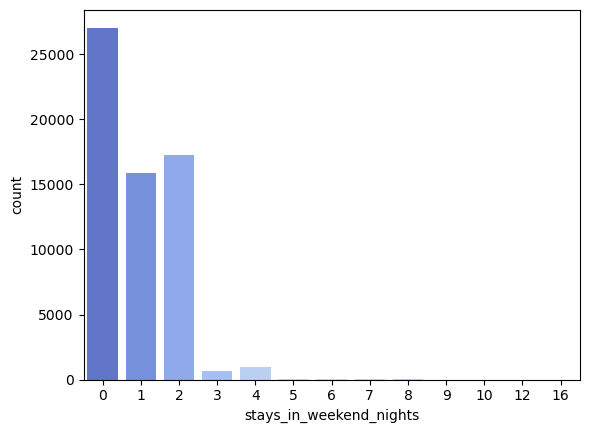

In [ ]:
sns.countplot(x='stays_in_weekend_nights', data = cuantitativas, palette='coolwarm')

<AxesSubplot:xlabel='stays_in_week_nights', ylabel='count'>

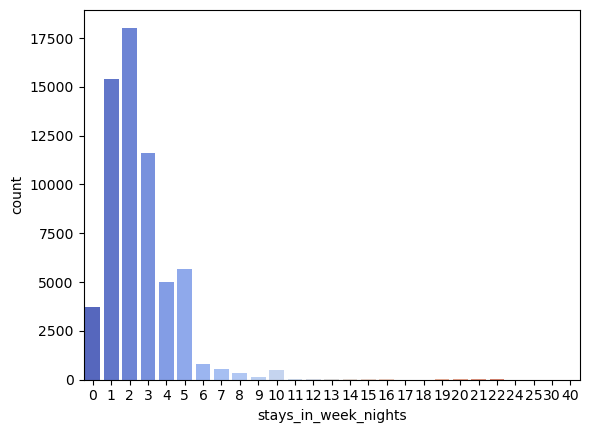

In [ ]:
sns.countplot(x='stays_in_week_nights', data = cuantitativas, palette='coolwarm')

<AxesSubplot:xlabel='adults', ylabel='count'>

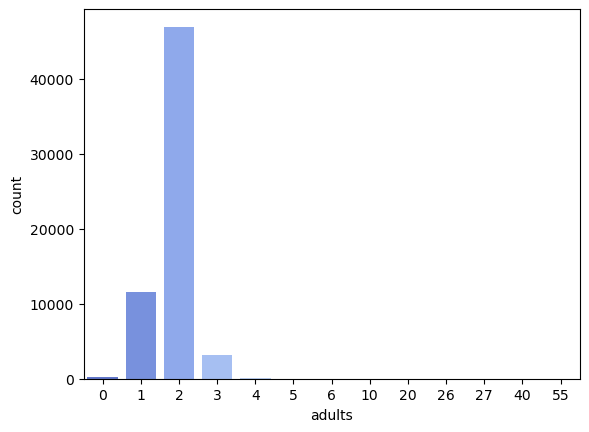

In [ ]:
sns.countplot(x='adults', data=cuantitativas, palette = 'coolwarm')

<AxesSubplot:xlabel='children', ylabel='count'>

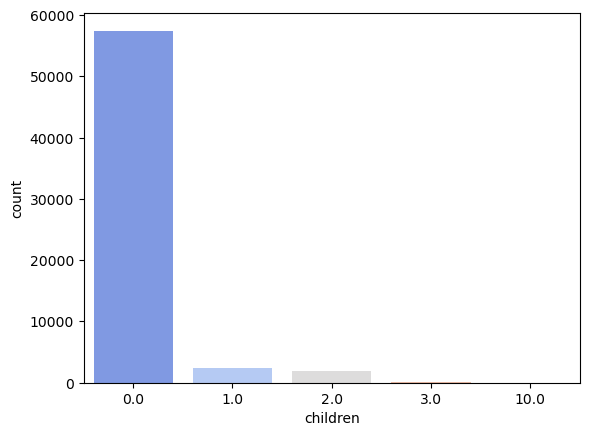

In [ ]:
sns.countplot(x='children', data=cuantitativas, palette = 'coolwarm')

<AxesSubplot:xlabel='babies', ylabel='count'>

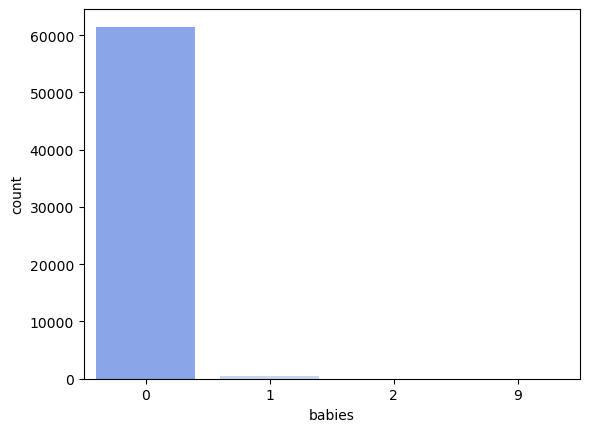

In [ ]:
sns.countplot(x='babies', data=cuantitativas, palette = 'coolwarm')

<AxesSubplot:xlabel='is_repeated_guest', ylabel='count'>

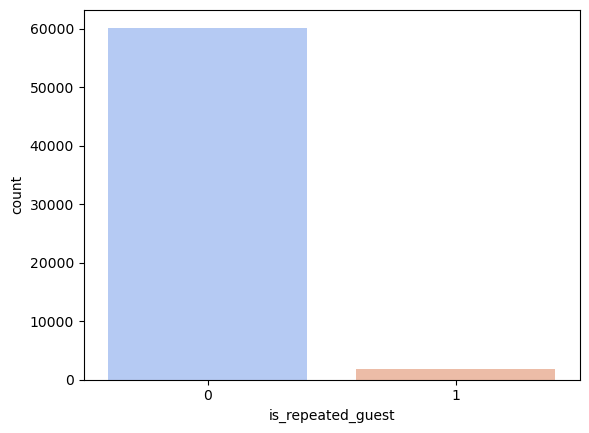

In [ ]:
sns.countplot(x='is_repeated_guest', data=cuantitativas, palette = 'coolwarm')

<AxesSubplot:xlabel='previous_cancellations', ylabel='count'>

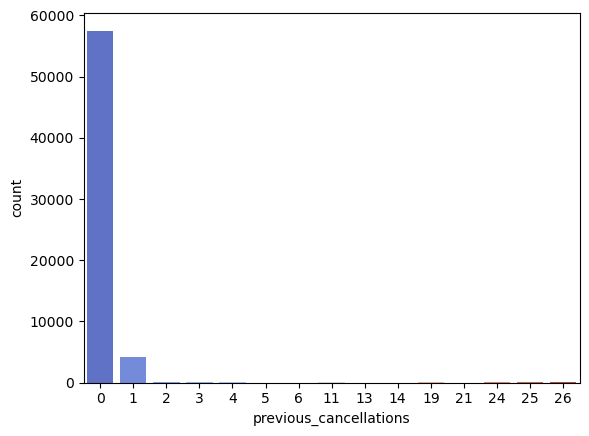

In [ ]:
sns.countplot(x='previous_cancellations', data=cuantitativas, palette = 'coolwarm')

<AxesSubplot:xlabel='previous_bookings_not_canceled', ylabel='Count'>

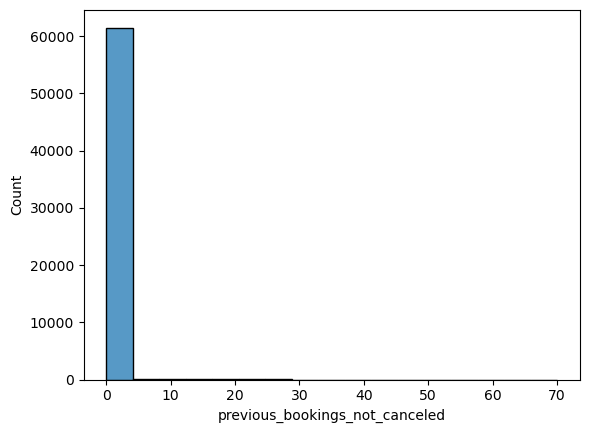

In [ ]:
sns.histplot(x='previous_bookings_not_canceled', data=cuantitativas)

<AxesSubplot:xlabel='booking_changes', ylabel='count'>

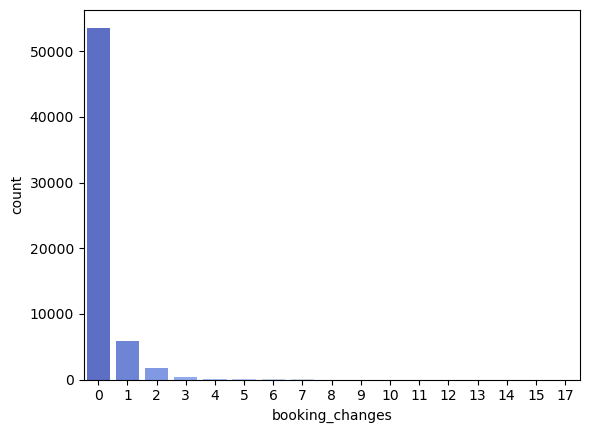

In [ ]:
sns.countplot(x='booking_changes', data=cuantitativas, palette = 'coolwarm')

<AxesSubplot:xlabel='days_in_waiting_list', ylabel='Count'>

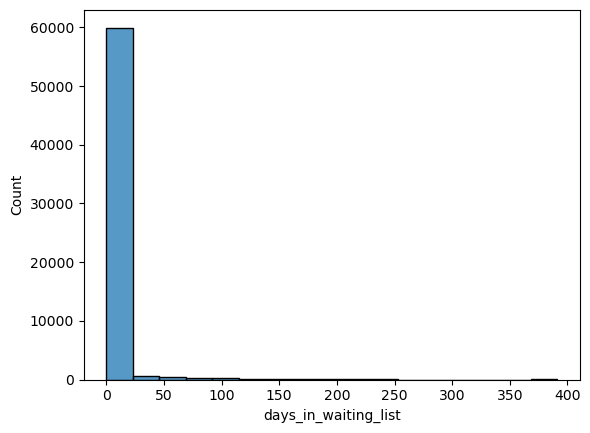

In [ ]:
sns.histplot(x='days_in_waiting_list', data=cuantitativas)

<AxesSubplot:xlabel='adr', ylabel='Count'>

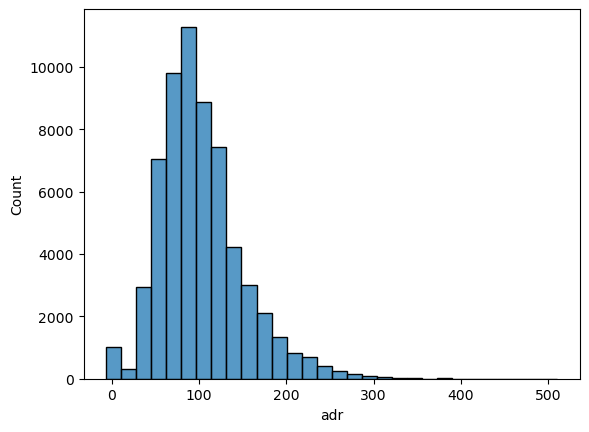

In [ ]:
sns.histplot(x='adr', data=cuantitativas, palette = 'coolwarm', bins=30)

<AxesSubplot:xlabel='required_car_parking_spaces', ylabel='count'>

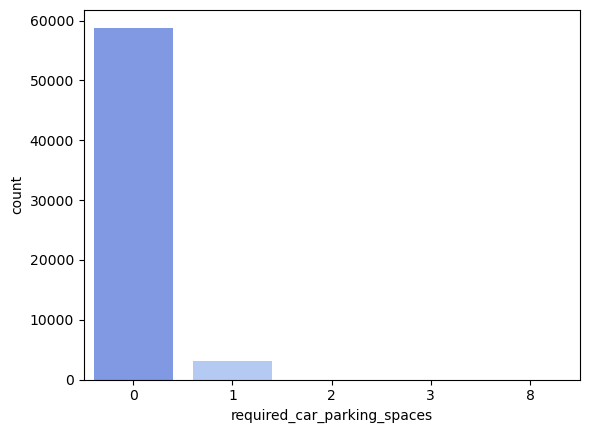

In [ ]:
sns.countplot(x='required_car_parking_spaces', data=cuantitativas, palette = 'coolwarm')

<AxesSubplot:xlabel='total_of_special_requests', ylabel='count'>

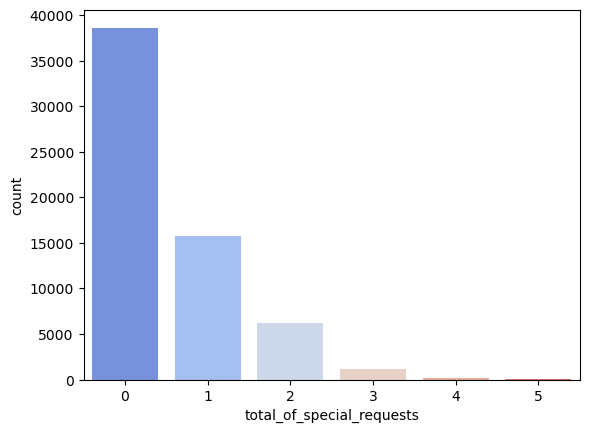

In [ ]:
sns.countplot(x='total_of_special_requests', data=cuantitativas, palette = 'coolwarm')

#### Correlaciones entre variables

Calculamos la matriz de correlaciones para ver las correlaciones entre las variables del dataset.

In [263]:
matriz_corr = hotel.corr()
matriz_corr

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_canceled
lead_time,1.000000,0.023186,0.134793,-0.006937,0.059463,0.140110,0.110942,-0.046058,-0.022872,-0.108033,0.094634,-0.068102,-0.019736,-0.078786,0.150773,0.166423,-0.094559,-0.113772,-0.122760,0.293816
arrival_date_year,0.023186,1.000000,-0.540542,0.002326,0.027066,0.040803,0.026576,0.059412,-0.013745,-0.004587,-0.142232,0.027109,0.027285,0.081634,0.243066,-0.058523,0.217409,-0.011620,0.107899,0.019923
arrival_date_week_number,0.134793,-0.540542,1.000000,0.057730,0.014127,0.012200,0.025886,0.006355,0.016215,-0.022037,0.045530,-0.023897,0.012086,-0.043968,-0.040886,0.019328,0.075427,0.001424,0.029283,0.008357
arrival_date_day_of_month,-0.006937,0.002326,0.057730,1.000000,-0.015518,-0.026449,0.002449,0.013991,0.002568,-0.005230,-0.034516,-0.002026,0.009522,0.002600,0.049011,0.027754,0.033695,0.000295,0.007744,-0.007371
stays_in_weekend_nights,0.059463,0.027066,0.014127,-0.015518,1.000000,0.488710,0.083397,0.051987,0.021991,-0.080412,-0.011110,-0.037958,0.043753,0.150907,0.066591,-0.057509,0.061136,-0.014228,0.072150,0.001279
stays_in_week_nights,0.140110,0.040803,0.012200,-0.026449,0.488710,1.000000,0.087992,0.058278,0.021390,-0.088363,-0.013417,-0.045190,0.070094,0.197293,0.211214,-0.004139,0.082910,-0.021657,0.073356,0.028439
adults,0.110942,0.026576,0.025886,0.002449,0.083397,0.087992,1.000000,0.029215,0.014812,-0.129198,-0.003197,-0.096896,-0.045378,-0.030557,0.181019,-0.009420,0.221538,0.010593,0.107599,0.060179
children,-0.046058,0.059412,0.006355,0.013991,0.051987,0.058278,0.029215,1.000000,0.028946,-0.029847,-0.027296,-0.019686,0.058871,0.056140,0.033754,-0.035480,0.350482,0.045272,0.080017,0.006242
babies,-0.022872,-0.013745,0.016215,0.002568,0.021991,0.021390,0.014812,0.028946,1.000000,-0.008925,-0.007734,-0.005790,0.088186,0.036594,0.026146,-0.010863,0.033735,0.036372,0.093348,-0.032034
is_repeated_guest,-0.108033,-0.004587,-0.022037,-0.005230,-0.080412,-0.088363,-0.129198,-0.029847,-0.008925,1.000000,0.075981,0.406030,0.008407,0.018729,-0.233782,-0.021828,-0.132263,0.073732,0.015965,-0.090492


Podemos graficar las correlaciones en un heatmap para que sea mas simple de ver

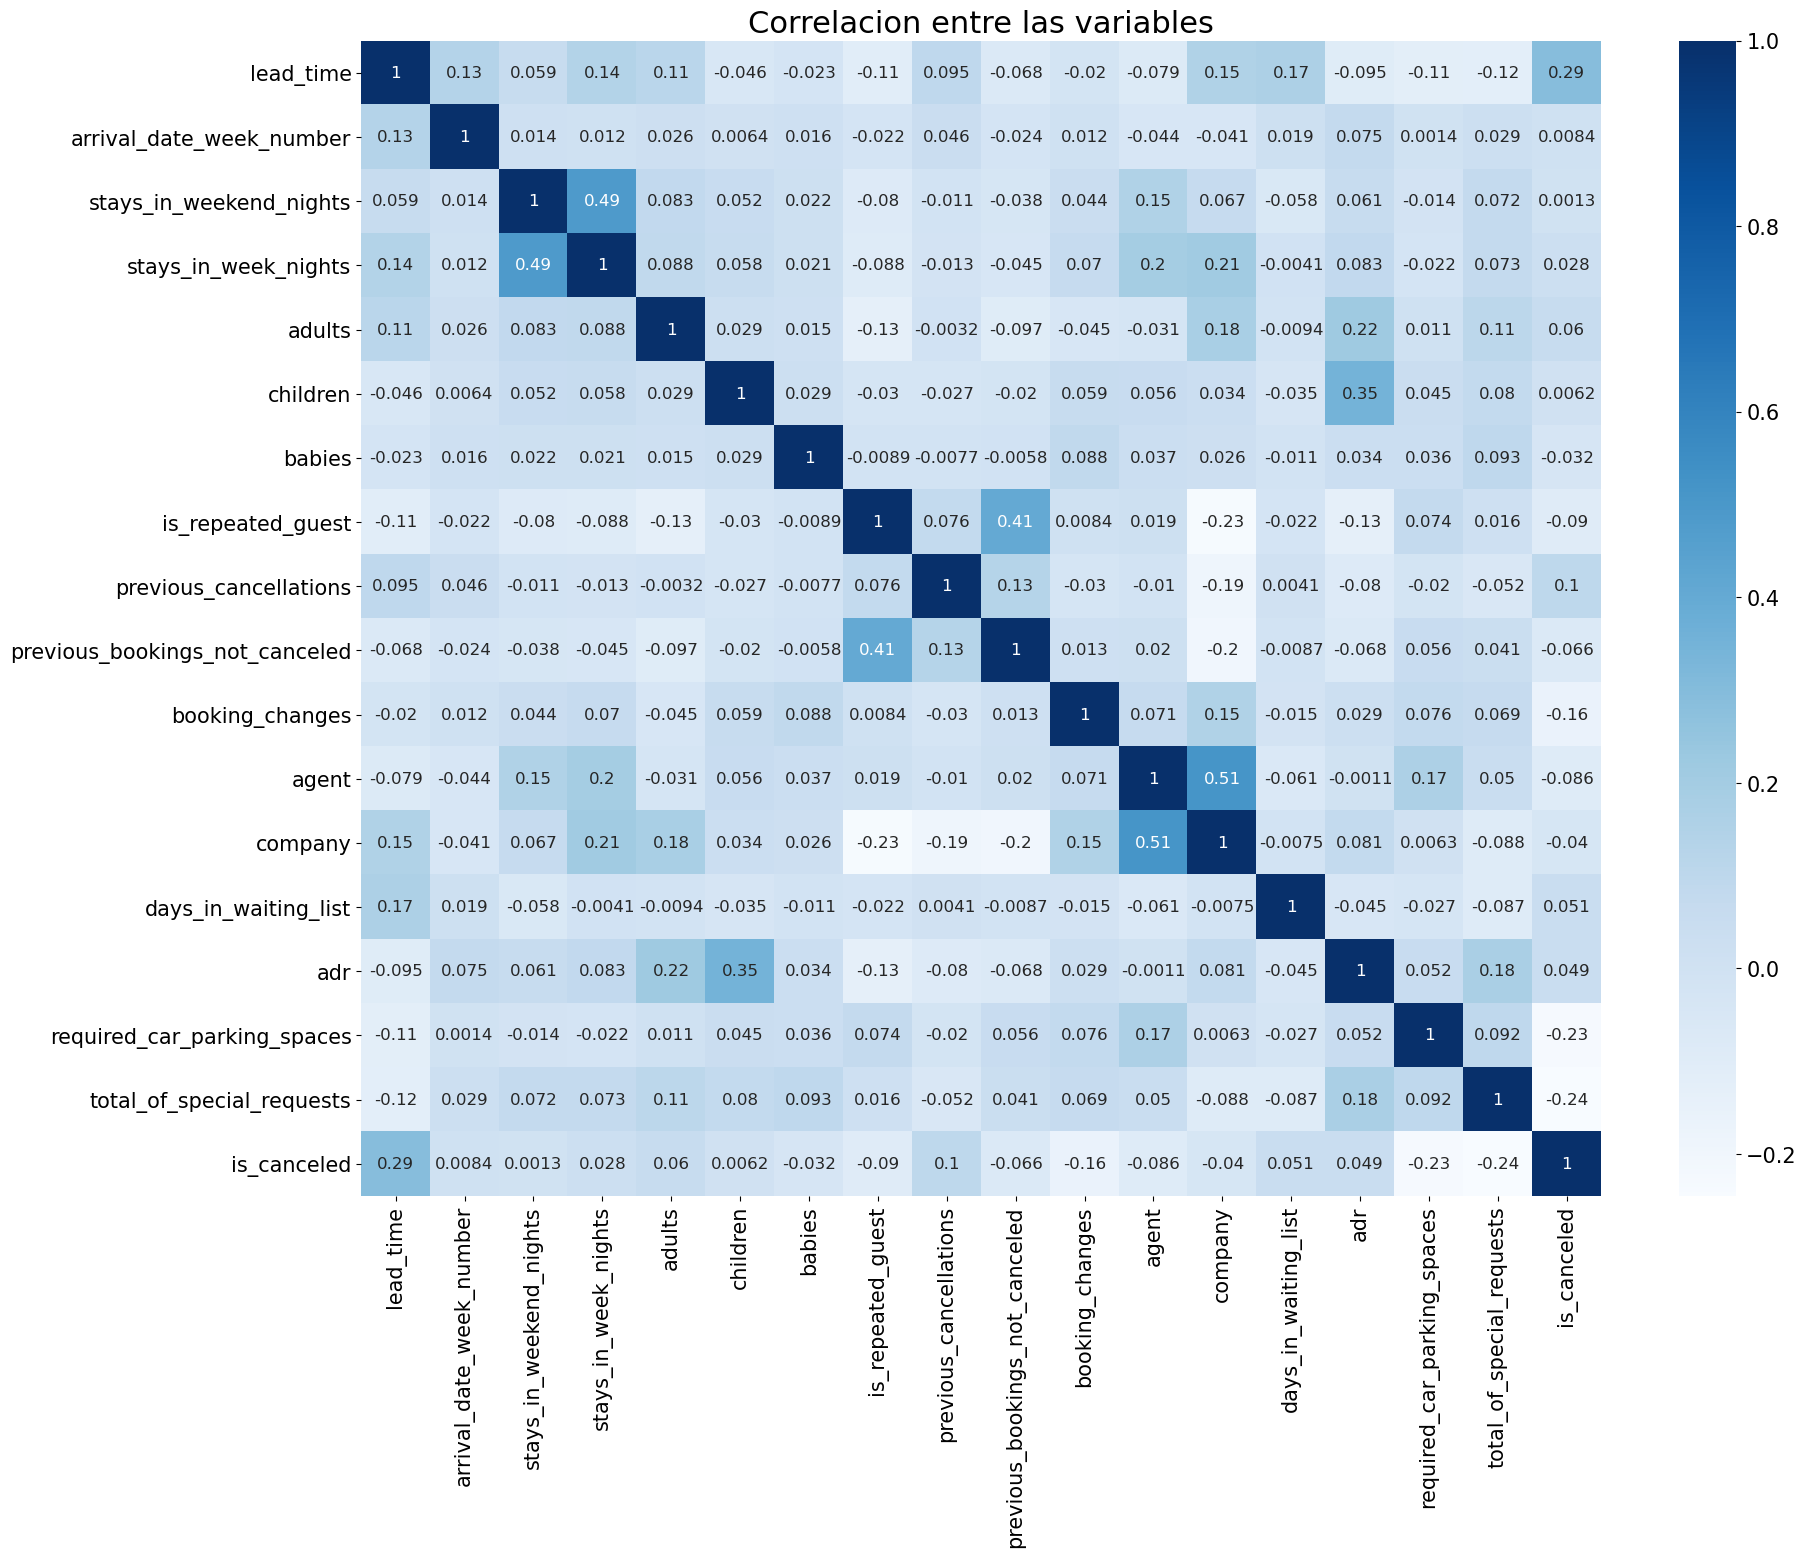

In [ ]:
fig = plt.figure(figsize=(20,15))
ax = sns.heatmap(data = matriz_corr, annot = True, annot_kws = {"size":12}, cmap='Blues')
ax.set_title('Correlacion entre las variables', fontsize=22)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)

No hay variables que tengan una correlacion demasiado alta, es decir, muy cercana a 1. Esto es bueno, ya que no hay variables que esten muy correlacionadas entre si.
Igualmente veremos mas de cerca aquellas variables que tengan un poco de correlacion. 

Las correlaciones con el target 'is_canceled' se analizan más adelante.

Vamos a considerar las correlaciones mayores a 0.3:
- `'stays_in_weekend_nights'` y `'stays_in_week_nights'`
- `'previous_bookings_not_canceled'` y `'is_repeated_guest'`
- `'children` y `'adr'`

[Text(0.5, 0, 'Noches de semana'),
 Text(0, 0.5, 'Noches de fin de semana'),
 Text(0.5, 1.0, 'Noches de semana vs. Noches de fin de semana')]

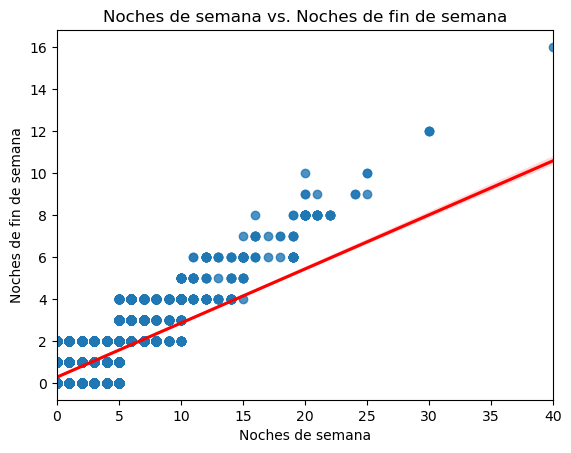

In [ ]:
sns.regplot(x=hotel['stays_in_week_nights'], y=hotel['stays_in_weekend_nights'], line_kws={'color':'red'}).set(xlabel='Noches de semana', ylabel='Noches de fin de semana', title='Noches de semana vs. Noches de fin de semana')

[Text(0.5, 0, 'Tarifas'),
 Text(0, 0.5, 'Cantidad de Niños'),
 Text(0.5, 1.0, 'Niños vs Tarifas')]

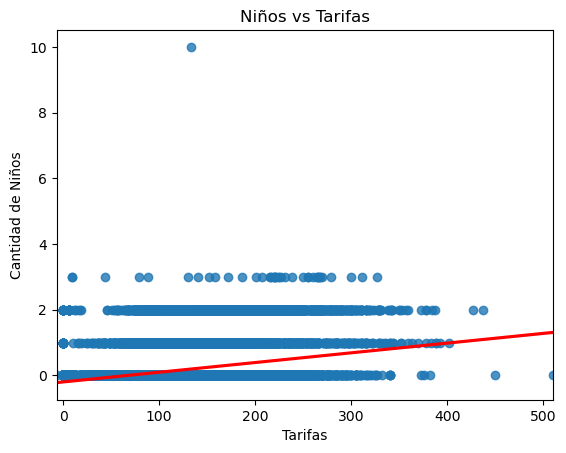

In [ ]:
sns.regplot(x=hotel['adr'], y= hotel['children'], line_kws={'color':'red'}).set(xlabel='Tarifas', ylabel='Cantidad de Niños', title= 'Niños vs Tarifas')

[Text(0.5, 0, 'Es cliente repetido'),
 Text(0, 0.5, 'Reservas no canceladas previamente'),
 Text(0.5, 1.0, 'Reservas no canceladas previamente vs. Es cliente repetido')]

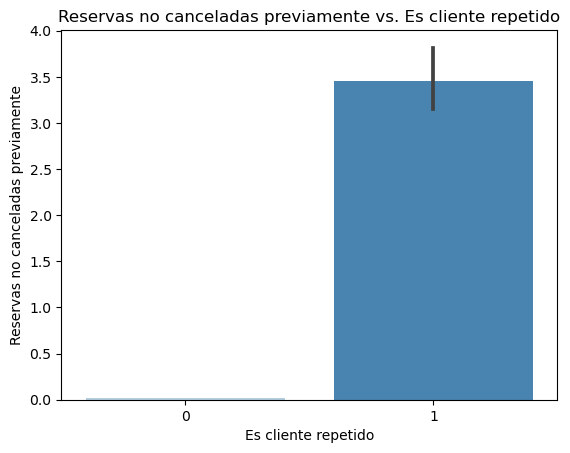

In [ ]:
sns.barplot(x=hotel['is_repeated_guest'], y=hotel['previous_bookings_not_canceled'],data=hotel, palette ='Blues').set(xlabel='Es cliente repetido', ylabel='Reservas no canceladas previamente', title= 'Reservas no canceladas previamente vs. Es cliente repetido') 

#### Relación de variables con el target

Ahora me quedo solo con las correlaciones entre las variables y nuestro target 'is_canceled'

Otra forma de ver las correlaciones entre variables es con scatterplots pero en este caso al ser tantas variables, no es de mucha utilidad.

In [ ]:
correlacion = hotel.corr()
correlacion['is_canceled'].sort_values(ascending=False).reset_index()

,index,is_canceled
0,is_canceled,1.000000
1,lead_time,0.293816
2,previous_cancellations,0.099613
3,adults,0.060179
4,days_in_waiting_list,0.050827
5,adr,0.049206
6,stays_in_week_nights,0.028439
7,arrival_date_year,0.019923
8,arrival_date_week_number,0.008357
9,children,0.006242


Las grafico también en un heatmap para verlas con mayor claridad

Text(0.5, 1.0, 'Correlacion entre las variables y el target')

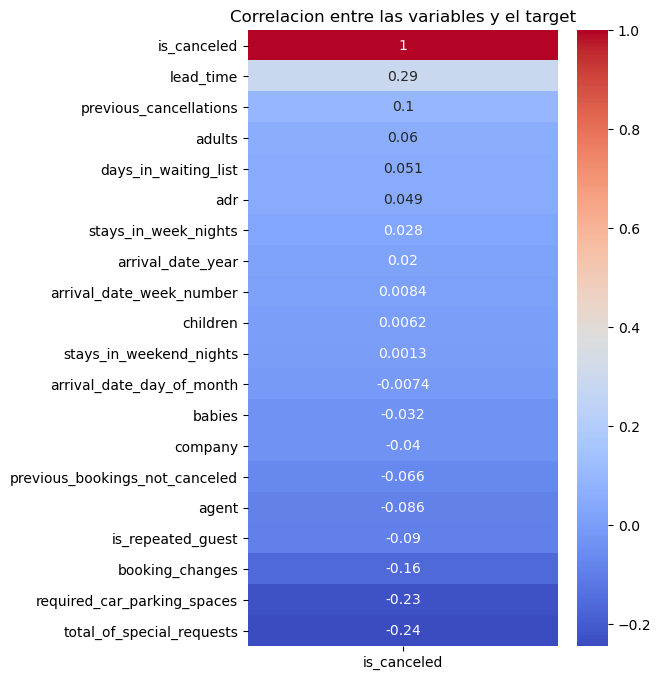

In [ ]:
fig = plt.figure(figsize=(5,8))
ax = sns.heatmap(correlacion[['is_canceled']].sort_values('is_canceled', ascending=False), annot = True, cmap='coolwarm')
ax.set_title('Correlacion entre las variables y el target', fontsize=12)

- ``'lead_time'`` es la variable que más está correlacionada con ``'is_canceled'``, nuestro target. Tiene sentido que a medida que pasan los días entre que se realiza la reserva y la fecha de llegada, los clientes tienen más tiempo para cancelar la reserva y hay más tiempo para que surja un imprevisto.
- La segunda variable con mayor correlacion con nuestro target es ``'total_of_special_requests'``. Esto podría pensarse como que el hotel tiene en cuenta las necesidades de los clientes y esto podría hacer que el cliente sea menos propenso a cancelar su reserva.
- ``'required_car_parking_spaces'`` es la tercera variable con mayor correlacion con nuestro target. Parecido a lo que ocurre con ``'total_of_special_requests'``, es lógico que si el cliente se compromente con el hotel (pidiendo un espacio de estacionamiento), será menos probable que cancele su reserva.
- El historial de un cliente con el hotel (``'previous_bookings_not_canceled'`` o ``'is_repeated_guest'``) no parece estar muy relacionado con la cancelación de la reserva. Pero, que un cliente ya haya cancelado reservas en el hotel si está más relacionado con la cancelación de la reserva.

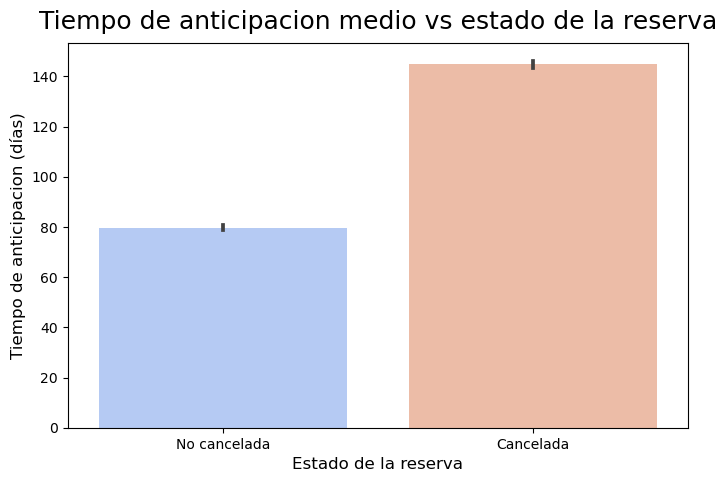

In [ ]:
plt.figure(figsize=(8,5)) 
plt.title("Tiempo de anticipacion medio vs estado de la reserva", fontsize = 18, pad = 10)
sns.barplot(x=hotel['is_canceled'], y=hotel['lead_time'], palette='coolwarm')
plt.xlabel("Estado de la reserva", fontsize = 12)
plt.ylabel("Tiempo de anticipacion (días)", fontsize = 12)
plt.xticks(ticks=[0, 1], labels=['No cancelada', 'Cancelada']);

Las reservas canceladas tienen un tiempo de anticipacion medio más largo.

In [ ]:
plt.figure(figsize=(8,5)) 
plt.title("Cantidad media de solicitudes especiales vs estado de la reserva", fontsize = 18, pad = 10)
sns.barplot(x=hotel['is_canceled'], y=hotel['total_of_special_requests'], palette='coolwarm')
plt.xlabel("Estado de la reserva", fontsize = 12)
plt.ylabel("Solicitudes especiales", fontsize = 12)
plt.xticks(ticks=[0, 1], labels=['No cancelada', 'Cancelada']);

Los clientes que cancelan sus reservas hacen menos peticiones especiales.

In [ ]:
plt.figure(figsize=(8,5)) 
plt.title("Cantidad media de lugares de estacionamiento solicitados vs estado de la reserva", fontsize = 18, pad = 10)
sns.barplot(x=hotel['is_canceled'], y=hotel['required_car_parking_spaces'], palette='coolwarm')
plt.xlabel("Estado de la reserva", fontsize = 12)
plt.ylabel("Lugares de estacionamiento solicitados", fontsize = 12)
plt.xticks(ticks=[0, 1], labels=['No cancelada', 'Cancelada']);

Los clientes que no cancelan sus reservas tienden a solicitar más lugares de estacionamiento.

In [ ]:
plt.figure(figsize=(10,5)) 
plt.title("Porcentaje de reservas canceladas por tipo de habitacion reservada", fontsize = 20, pad = 10)
sns.barplot(x=hotel['reserved_room_type'], y=hotel['is_canceled'], palette='coolwarm')
plt.xlabel("Tipo de habitación", fontsize = 12)
plt.ylabel("Porcentaje de reservas canceladas", fontsize = 12);

Los clientes que reservaron los tipos de habitación P y L tienen el mayor porcentaje de cancelación de reservas, con un 100% de reservas canceladas.

In [ ]:
plt.figure(figsize=(10,5)) 
plt.title("Porcentaje de reservas canceladas por tipo de depósito", fontsize = 20, pad = 10)
sns.barplot(x=hotel['deposit_type'], y=hotel['is_canceled'], palette='coolwarm')
plt.xlabel("Tipo de depósito", fontsize = 12)
plt.ylabel("Porcentaje de reservas canceladas", fontsize = 12);

Los clientes que pagan un depósito no reembolsable tienen un porcentaje mucho mayor de reservas canceladas.

In [ ]:
sns.countplot(x='customer_type', data=hotel, hue='is_canceled', palette='coolwarm')

In [ ]:
sns.countplot(x='is_repeated_guest', data=hotel, hue='is_canceled', palette='coolwarm')

### **Visualización de los datos**

### **Datos faltantes**

#### Análisis

In [ ]:

# Obtengo una serie con la suma de nulos por columna.
cols_null = hotel.isna().sum()

# Filtro las columnas para quedarme solo con las que tienen nulos.
# Luego, reseteo el índice y renombro las columnas.
cols_null = cols_null[cols_null > 0].reset_index().rename(
    columns={'index': 'Columna', 0: 'Cant. nulos'})

# Ordeno las columnas por cantidad de nulos.
cols_null = cols_null.sort_values(
    by='Cant. nulos', ascending=False)

# Agrego una columna con el porcentaje de nulos respecto a la cantidad total de datos.
cols_null['% nulos'] = (cols_null['Cant. nulos'] /
                        hotel.shape[0] * 100).round(3)

cols_null


,Columna,Cant. nulos,% nulos
3,company,58761,94.909
2,agent,7890,12.744
1,country,221,0.357
0,children,4,0.006


<AxesSubplot:xlabel='Columna', ylabel='% nulos'>

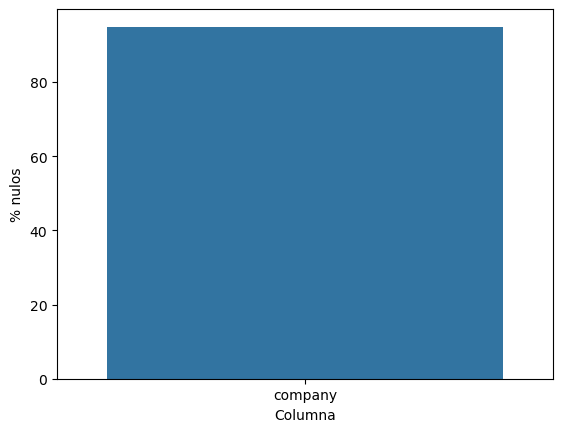

In [ ]:
sns.barplot(x='Columna', y='% nulos',
            data=cols_null.loc[cols_null['Columna'] == 'company'])


<AxesSubplot:xlabel='Columna', ylabel='% nulos'>

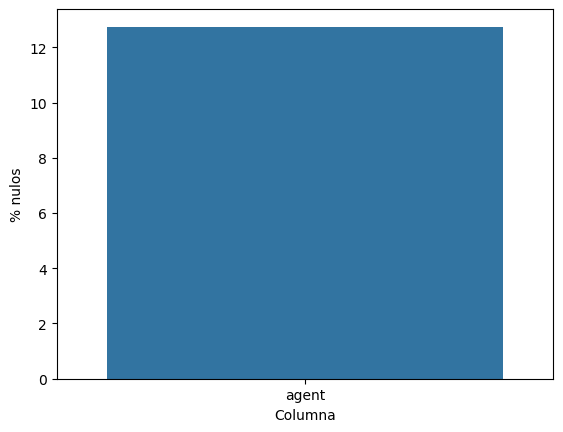

In [ ]:
sns.barplot(x='Columna', y='% nulos',
            data=cols_null.loc[cols_null['Columna'] == 'agent'])


<AxesSubplot:xlabel='Columna', ylabel='% nulos'>

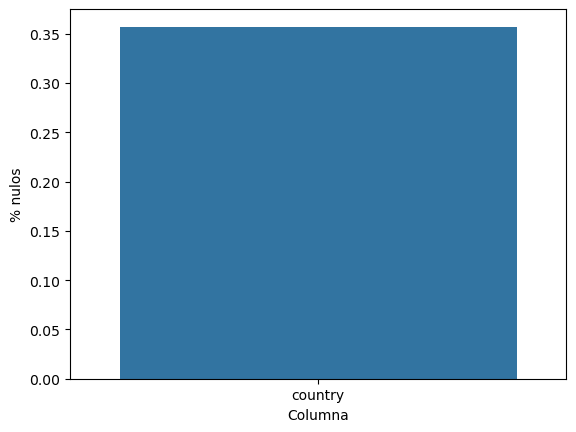

In [ ]:
sns.barplot(x='Columna', y='% nulos',
            data=cols_null.loc[cols_null['Columna'] == 'country'])


<AxesSubplot:xlabel='Columna', ylabel='% nulos'>

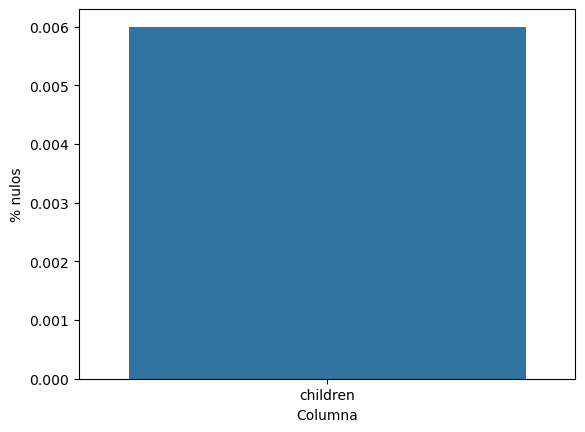

In [ ]:
sns.barplot(x='Columna', y='% nulos',
            data=cols_null.loc[cols_null['Columna'] == 'children'])


#### Revisión y decisión

##### Nulls en ``'children'``

Por el ínfimo porcentaje de datos faltantes en la columna "children", podemos simplemente eliminar las filas que tienen este dato como null.

In [ ]:
# drop records where 'children' is null
hotel.dropna(subset=['children'], inplace=True)


In [ ]:
print("Cantidad de registros", hotel.shape[0])

Cantidad de registros 61913


Confirmamos que se eliminaron 4 registros del dataset.

##### Nulls en ``'country'``

##### Nulls en ``'company'``

En la columna ``company``, el 95% de los registros tienen ``null`` como valor. En principio, nos inclinamos a pensar que este dato casi no fue registrado, o falta para la mayoría de los registros. Pero revisando el paper, nos encontramos con la siguiente aclaración:

> The PMS assured no missing data exists in its database tables. However, in some categorical
variables like Agent or Company, “NULL” is presented as one of the categories. This should not be
considered a missing value, but rather as “not applicable”. For example, if a booking “Agent” is defined as “NULL” it means that the booking did not came from a travel agent.

En criollo, nos aclaran que ``null`` en esta columna no debería interpretarse como dato faltante, sino como "no aplica". Para las columnas ``company`` y ``agent``, un valor ``null`` debería entenderse como "no reservó a través de compañía/agente".

Ignorar estos datos puede causar que perdamos información que podría resultar útil para entrenar el modelo. ¿Es posible que exista una correlación entre la compañía usada y la cancelación? ¿Entre el agente y cancelación? ¿Y si en realidad lo que importa es el hecho de reservar por agente, compañía o en persona; y no específicamente cuál?

Es necesario responder estas preguntas para poder tratar correctamente con estos datos. Se nos ocurren dos alternativas:
- Reconvertir las columnas a un dato booleano, que indique si se usó o no agente/compañía.
- Interpretar a los ``null`` como un agente o compañía más.

La primera opción sería la mejor, se acota considerablemente el rango de valores posibles, pero no se pierde toda la información. Si la cantidad de agentes/compañías repetidos es bajísimo (casi todas las reservas se hacen con agentes/compañías distintas), casi no se podría inferir información. Que una vez un agente haya cancelado, puede sentar un mal precedente, pero de ningún modo se deduce que lo volverá a hacer. También, si resulta que todos los agentes/compañías cancelan con más o menos la misma frecuencia; sería un indicador de que el dato específico de quién/cuál agente/compañía reserva es indistinto. Estas opciones indican que se puede simplificar a la primera opción sin pérdida de información.

Si, por el contrario, hay algunos agentes/compañías presentes en muchos registros, y se puede deducir algo de ello, quizás no sea conveniente reconvertir las columnas a booleanos. Si un agente reservó 1000 veces, y canceló 999... ya un sustento más fuerte para creer que volverá a cancelar.

Revisaremos entonces la distribución de agentes y compañías respecto al target del modelo, la columna ``is_canceled``.

<AxesSubplot:xlabel='count', ylabel='company'>

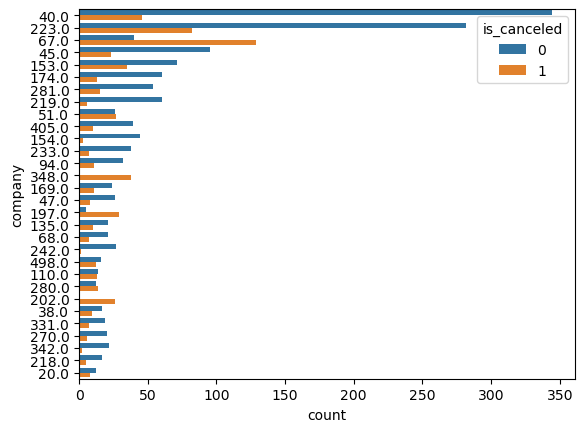

In [ ]:
# graficar 'company' contra 'is_canceled', ordenar por apariciones, los 30 primeros
sns.countplot(y='company', data=hotel, hue='is_canceled',
              order=hotel['company'].value_counts().iloc[:30].index)


<AxesSubplot:xlabel='count', ylabel='agent'>

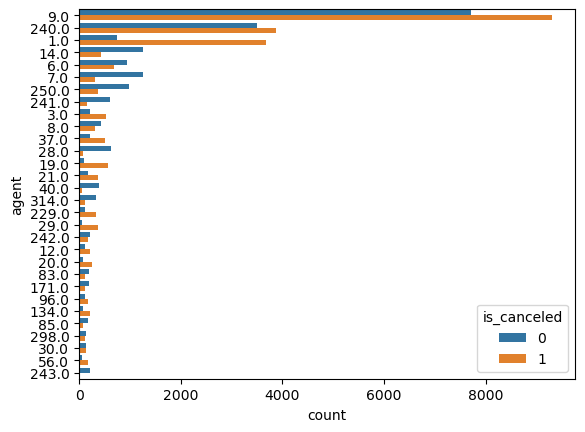

In [ ]:
# graficar 'agent' contra 'is_canceled', ordenar por apariciones, los 30 primeros
sns.countplot(y='agent', data=hotel, hue='is_canceled',
              order=hotel['agent'].value_counts().iloc[:30].index)


In [ ]:
# create a new column 'is_used_agent' that is 1 if 'agent' is not null, 0 otherwise
_hotel = hotel.copy()
_hotel['is_used_agent'] = _hotel['agent'].notna().astype(int)
_hotel['is_used_agent'].value_counts()


1    54023
0     7890
Name: is_used_agent, dtype: int64

In [ ]:
# create a new column 'is_used_company' that is 1 if 'company' is not null, 0 otherwise
_hotel['is_used_company'] = _hotel['company'].notna().astype(int)
_hotel['is_used_company'].value_counts()


0    58761
1     3152
Name: is_used_company, dtype: int64

In [ ]:
# create a new column 'is_used_company' that is 1 if 'company' is not null, 0 otherwise
_hotel['is_used_company'] = _hotel['company'].notna().astype(int)
_hotel['is_used_company'].value_counts()


0    58761
1     3152
Name: is_used_company, dtype: int64

No sé cómo intrepretar este dato... ¿Cómo usaron compañía y agente a la vez?

##### Nulls en ``'agent'``

#### Comparaciones

### **Valores atípicos**

#### Detección

##### Univariada

Vamos a intentar identificar outliers univariados mediante el análisis de boxplots.

<AxesSubplot:ylabel='adr'>

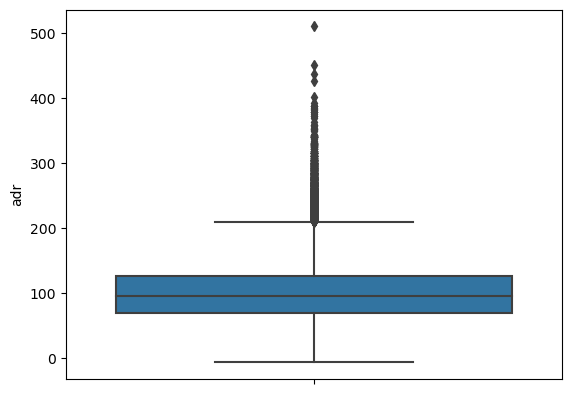

In [ ]:
sns.boxplot(y=hotel.adr)

In [ ]:
hotel.adr.agg(['min','max']).reset_index()

,index,adr
0,min,-6.38
1,max,510.00


Podemos ver que la variable ``'adr'`` tiene outliers. Con un mínimo en -6.38 y un máximo en 510.

In [ ]:
#Cuartiles
Q1_altura = np.quantile(hotel.adr,0.25)
Q3_altura = np.quantile(hotel.adr,0.75)

#Rango intercuartil
IQR_altura = Q3_altura-Q1_altura

#Limite inferior Outliers
out_inf = Q1_altura-1.5*IQR_altura
out_sup = Q3_altura+1.5*IQR_altura
print('Valores por debajo de', out_inf, 'son outliers moderados inferiores.')
print('Valores por arriba de', out_sup, 'son outlier moderados superiores.')

Valores por debajo de -14.0 son outliers inferiores.
Valores por arriba de 210.0 son outlier superiores.


In [ ]:
out_inf = Q1_altura-3*IQR_altura
out_sup = Q3_altura+3*IQR_altura
print('Valores por debajo de', out_inf, 'son outliers severos inferiores.')
print('Valores por arriba de', out_sup, 'son outlier severos superiores.')

Valores por debajo de -98.0 son outliers severos inferiores.
Valores por arriba de 294.0 son outlier severos superiores.


Considerando estos valores y los max y min de ``'adr'``, podemos ver que tiene outliers superiores tanto moderados como severos, pero no cuenta con outliers inferiores.

In [228]:
#Observacion anomala
outliers = hotel[hotel['adr']>300].sort_values(by='adr', ascending=False)
outliers

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_canceled,arrival_date
55460,City Hotel,0,2017,May,19,9,0,1,1,0.0,...,No Deposit,159.0,NaN,0,Transient,510.00,0,0,0,2017-05-09
50240,Resort Hotel,378,2017,August,31,1,4,10,2,0.0,...,No Deposit,314.0,NaN,0,Transient,450.00,0,0,1,2017-08-01
54002,Resort Hotel,59,2017,August,33,13,2,4,2,2.0,...,No Deposit,250.0,NaN,0,Transient,437.00,0,0,1,2017-08-13
8690,Resort Hotel,31,2017,August,31,1,2,6,2,2.0,...,No Deposit,250.0,NaN,0,Transient,426.25,0,2,0,2017-08-01
60071,Resort Hotel,104,2017,August,33,17,2,3,3,1.0,...,No Deposit,240.0,NaN,0,Transient,402.00,0,1,0,2017-08-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46602,Resort Hotel,136,2017,August,31,1,2,5,3,1.0,...,No Deposit,240.0,NaN,0,Transient,301.43,0,0,1,2017-08-01
31748,Resort Hotel,57,2017,July,27,2,2,5,2,2.0,...,No Deposit,240.0,NaN,0,Transient,300.86,0,0,1,2017-07-02
60771,Resort Hotel,10,2016,August,34,20,1,1,2,1.0,...,No Deposit,250.0,NaN,0,Transient,300.60,1,0,0,2016-08-20
4187,Resort Hotel,205,2017,August,31,2,1,4,2,2.0,...,No Deposit,240.0,NaN,0,Transient,300.40,0,2,1,2017-08-02


Ahora probemos lás técnicas z-score y z-score modificado

In [14]:
hotel_cpy = hotel.copy()

In [15]:
#z-score de la variable 'adr'
media_adr =  np.mean(hotel_cpy.adr)
std_adr = np.std(hotel_cpy.adr)
hotel_cpy['z_adr'] = (hotel_cpy.adr - media_adr)/std_adr

In [5]:
hotel_cpy[hotel_cpy['z_adr']>3]

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,z_adr
238,Resort Hotel,38,2017,August,32,7,1,5,2,1.0,...,250.0,NaN,0,Transient,302.5,0,1,988bf050-6aa8-4211-ac09-752c4e58bcbd,0,4.190279
307,City Hotel,31,2017,May,20,19,0,1,3,0.0,...,14.0,NaN,0,Transient,279.0,0,0,2094b29e-7f3e-4846-8c87-4a73683bc804,1,3.698207
320,Resort Hotel,212,2017,July,28,14,3,7,2,2.0,...,240.0,NaN,0,Transient,289.6,0,0,21d96765-304c-437f-b745-f82e8a41e471,1,3.920163
439,City Hotel,21,2017,July,27,6,0,1,2,2.0,...,9.0,NaN,0,Transient,307.0,0,0,f4330103-9555-4f10-b40b-52fc138e341c,1,4.284506
481,City Hotel,145,2016,August,32,4,0,3,2,3.0,...,8.0,NaN,0,Transient,269.3,0,1,c5ca8a03-6e90-4165-853e-a7437487410c,0,3.495097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61689,City Hotel,72,2017,July,27,2,2,0,3,0.0,...,9.0,NaN,0,Transient,247.0,0,1,dfb7933d-560b-4a82-a127-919e534351d1,0,3.028152
61745,Resort Hotel,205,2017,August,31,2,1,4,2,2.0,...,240.0,NaN,0,Transient,300.4,0,2,f4bd2623-14df-4912-8abf-b698381ac634,1,4.146307
61830,Resort Hotel,72,2017,July,30,28,1,2,2,0.0,...,242.0,NaN,0,Transient,271.0,0,2,0d1b3abd-3c4c-46c0-a829-11bacf4033ff,0,3.530693
61834,Resort Hotel,95,2017,July,30,24,1,4,2,2.0,...,240.0,NaN,0,Transient,305.0,0,0,6dec4274-f4ec-4c4a-88fb-cb6b4878745a,1,4.242627


In [6]:
hotel_cpy[hotel_cpy['z_adr']<-3]

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,z_adr


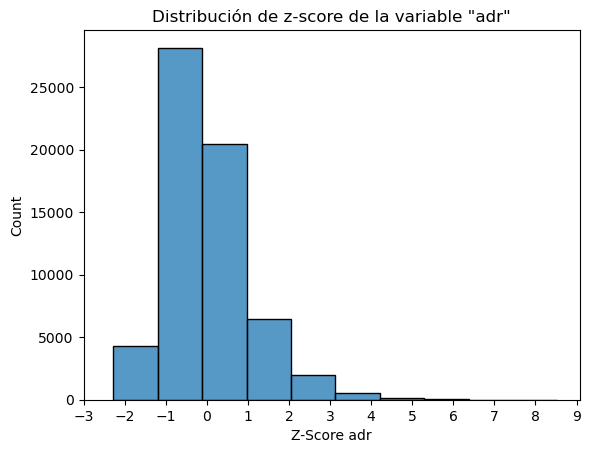

In [261]:
sns.histplot(hotel_cpy.z_adr, bins=10).set(title='Distribución de z-score de la variable "adr"', xlabel='Z-Score adr')

plt.xticks(np.arange(-3, 10, 1))
plt.show()

In [16]:
#z-score modificado de la variable 'adr'
mediana_adr = np.median(hotel_cpy.adr)
MAD = np.median(np.absolute(hotel_cpy.adr-mediana_adr))
hotel_cpy['zm_adr'] = (hotel_cpy.adr - mediana_adr)*0.6745/MAD

In [8]:
hotel_cpy[(hotel_cpy['zm_adr']>3.5)]

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,z_adr,zm_adr
217,City Hotel,22,2016,July,30,21,0,2,2,2.0,...,NaN,0,Transient,240.0,0,1,1fc36f05-afce-4e05-b1d8-064efd387417,0,2.881577,3.525685
238,Resort Hotel,38,2017,August,32,7,1,5,2,1.0,...,NaN,0,Transient,302.5,0,1,988bf050-6aa8-4211-ac09-752c4e58bcbd,0,4.190279,5.045377
307,City Hotel,31,2017,May,20,19,0,1,3,0.0,...,NaN,0,Transient,279.0,0,0,2094b29e-7f3e-4846-8c87-4a73683bc804,1,3.698207,4.473973
320,Resort Hotel,212,2017,July,28,14,3,7,2,2.0,...,NaN,0,Transient,289.6,0,0,21d96765-304c-437f-b745-f82e8a41e471,1,3.920163,4.731712
439,City Hotel,21,2017,July,27,6,0,1,2,2.0,...,NaN,0,Transient,307.0,0,0,f4330103-9555-4f10-b40b-52fc138e341c,1,4.284506,5.154795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61689,City Hotel,72,2017,July,27,2,2,0,3,0.0,...,NaN,0,Transient,247.0,0,1,dfb7933d-560b-4a82-a127-919e534351d1,0,3.028152,3.695890
61745,Resort Hotel,205,2017,August,31,2,1,4,2,2.0,...,NaN,0,Transient,300.4,0,2,f4bd2623-14df-4912-8abf-b698381ac634,1,4.146307,4.994315
61830,Resort Hotel,72,2017,July,30,28,1,2,2,0.0,...,NaN,0,Transient,271.0,0,2,0d1b3abd-3c4c-46c0-a829-11bacf4033ff,0,3.530693,4.279452
61834,Resort Hotel,95,2017,July,30,24,1,4,2,2.0,...,NaN,0,Transient,305.0,0,0,6dec4274-f4ec-4c4a-88fb-cb6b4878745a,1,4.242627,5.106164


In [9]:
hotel_cpy[(hotel_cpy['zm_adr']<-3.5)]

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,z_adr,zm_adr


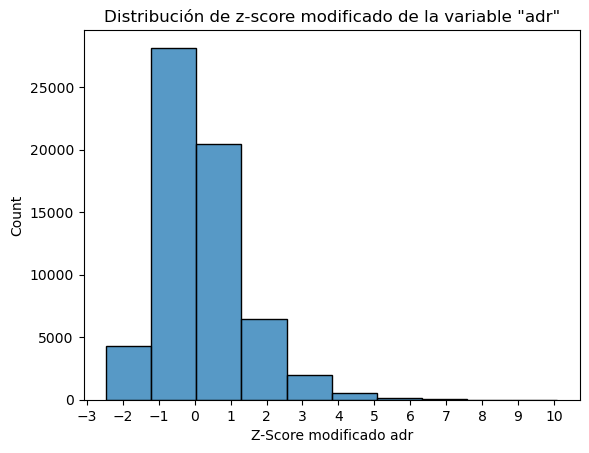

In [262]:
sns.histplot(hotel_cpy.zm_adr, bins=10).set(title='Distribución de z-score modificado de la variable "adr"', xlabel='Z-Score modificado adr')

plt.xticks(np.arange(-3, 11, 1))

plt.show()

<AxesSubplot:ylabel='children'>

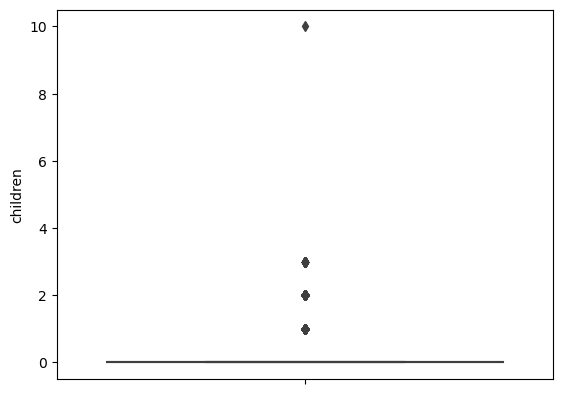

In [67]:
sns.boxplot(y=hotel.children)

In [68]:
hotel.children.describe().reset_index()

,index,children
0,count,61909.000000
1,mean,0.104896
2,std,0.402847
3,min,0.000000
4,25%,0.000000
5,50%,0.000000
6,75%,0.000000
7,max,10.000000


<AxesSubplot:ylabel='babies'>

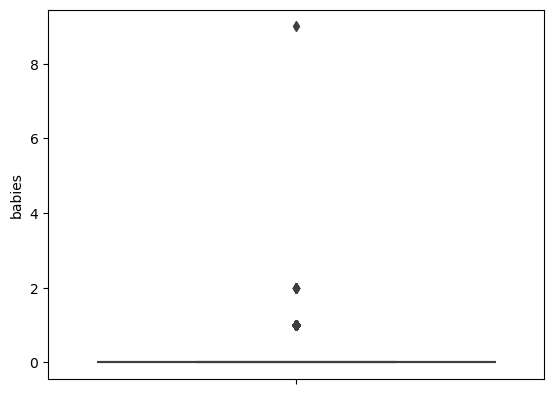

In [69]:
sns.boxplot(y=hotel.babies)

In [70]:
hotel.babies.describe().reset_index()

,index,babies
0,count,61913.000000
1,mean,0.007155
2,std,0.092158
3,min,0.000000
4,25%,0.000000
5,50%,0.000000
6,75%,0.000000
7,max,9.000000


<AxesSubplot:ylabel='adults'>

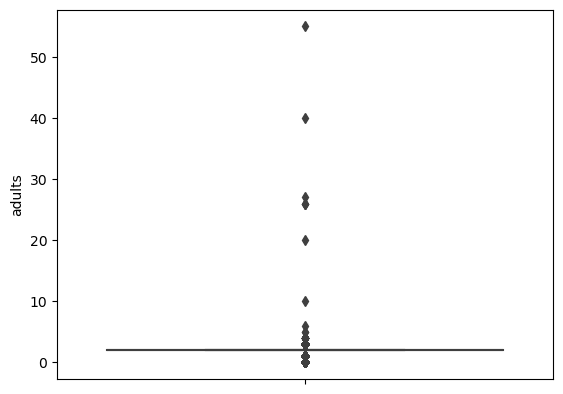

In [71]:
sns.boxplot(y=hotel.adults)

In [72]:
hotel.adults.describe().reset_index()

,index,adults
0,count,61913.000000
1,mean,1.862791
2,std,0.589066
3,min,0.000000
4,25%,2.000000
5,50%,2.000000
6,75%,2.000000
7,max,55.000000


Hay reservas con 0 adultos.

<AxesSubplot:ylabel='previous_cancellations'>

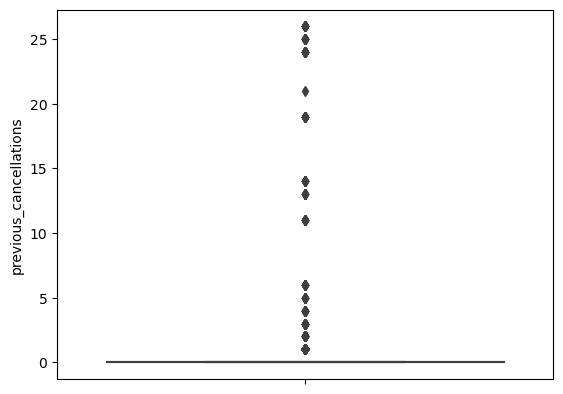

In [73]:
sns.boxplot(y=hotel.previous_cancellations)

In [74]:
hotel.previous_cancellations.describe().reset_index()

,index,previous_cancellations
0,count,61913.000000
1,mean,0.114790
2,std,0.993723
3,min,0.000000
4,25%,0.000000
5,50%,0.000000
6,75%,0.000000
7,max,26.000000


##### Multivariada

Primero utiliaremos la distancia de Mahalanobis

#### Características

#### Tratamiento

## BORRADOR ///

In [ ]:
#Datos nulos
hotel.isna().sum()

'company' y 'agent' tienen muchos datos faltantes, puede que sea una variable irrelevante para el análisis

In [ ]:
#Datos no nulos
hotel.notna().sum()

In [ ]:
# ¿Cuál es la proporción de reservas canceladas en relación con el total de reservas?
prop_cancelaciones = len(hotel[hotel['is_canceled'] == 1]) / len(hotel) *100
print(f"La proporción de reservas canceladas en relación al total de reservas es {prop_cancelaciones:.2f}%")

In [ ]:
# ¿Existe alguna relación entre el tiempo en lista de espera y las reservas canceladas?
pd.crosstab(hotel['days_in_waiting_list'], hotel['is_canceled'])

In [ ]:
# graficar cancelado vs tiempo de espera
sns.scatterplot(x='days_in_waiting_list', y='is_canceled', data=hotel, hue='is_canceled', alpha=0.1)

In [ ]:
# ¿Cuál es la proporción de reservas canceladas por clientes Transient en relación con el total de reservas realizadas por clientes Transient?
prop_cancelaciones_transient = len(hotel[(hotel['is_canceled'] == 1) & (hotel['customer_type'] == 'Transient')]) / len(hotel[(hotel['customer_type'] == 'Transient')]) *100
print(f"La proporción de reservas canceladas por clientes Transient es {prop_cancelaciones_transient:.2f}%")

In [ ]:
# Reservas canceladas por tarifa
pd.crosstab(hotel['adr'], hotel['is_canceled']).sort_values(by=1, ascending=False)

In [ ]:
# Graficar canceldas por tarifa
sns.scatterplot(x='adr', y='is_canceled', data=hotel, hue='is_canceled', alpha=0.1)

In [ ]:
# Reservas canceladas por pais
pd.crosstab(hotel['country'], hotel['is_canceled']).sort_values(by=1, ascending=False)

In [ ]:
# graficar canceladas por 30 primeros paises
pd.crosstab(hotel['country'], hotel['is_canceled']).sort_values(by=1, ascending=False).head(30).plot(kind='bar', figsize=(20,10))


In [ ]:
# Reservas canceladas segun el tipo de comida
pd.crosstab(hotel['meal'], hotel['is_canceled']).sort_values(by=1, ascending=False)


In [ ]:
# graficareservas canceladas segun el tipo de comida
sns.countplot(x='meal', data=hotel, hue='is_canceled')

In [ ]:
# Estado de las reservas segun el tipo de distribucion
pd.crosstab(hotel['distribution_channel'], hotel['is_canceled']).sort_values(by=1, ascending=False)

In [ ]:
# graficar reservas canceladas segun el tipo de distribucion
sns.countplot(x='distribution_channel', data=hotel, hue='is_canceled')

In [ ]:
# graficar reservas canceladas segun el tiempo entre la reserva y la llegada
# sns.scatterplot(x='lead_time', y='is_canceled', data=hotel, hue='is_canceled', alpha=0.002)

sns.regplot(x='lead_time', y='is_canceled', data=hotel, logistic=True, y_jitter=0.03)


In [ ]:
# ¿Existe alguna relación entre la cantidad de adultos, niños y bebés en una reserva y el estado de la reserva?

pd.crosstab(index=[hotel['adults'], hotel['children'], hotel['babies']], columns=hotel['is_canceled']).sort_values(by=1, ascending=False).head(10)


In [ ]:
sns.scatterplot(x='lead_time', y='is_canceled', data=hotel, hue='is_canceled')
plt.gca().set_title('Relación entre el tiempo de espera y el estado de la reserva')
plt.gca().set_xlabel('Tiempo de espera')
plt.gca().set_ylabel('Estado de la reserva')
plt.gca().set_xticks(range(0, 700, 50))
plt.gca().set_yticks(range(0, 2, 1))
plt.show()

In [ ]:
sns.countplot(x='previous_cancellations', hue='is_canceled', data=hotel)
plt.show()

In [ ]:
# graficar relacion entre 'arrival_date_year' y 'is_canceled'
# sns.countplot(x='arrival_date_year', hue='is_canceled', data=hotel)
# sns.countplot(x='arrival_date_month', hue='is_canceled', data=hotel)
# sns.countplot(x='arrival_date_day_of_month', hue='is_canceled', data=hotel)
sns.countplot(x='arrival_date_week_number', hue='is_canceled', data=hotel)


In [ ]:
hotel_reducido = hotel.copy()

# combinar las columnas de fechas en una sola
hotel_reducido['arrival_date'] = hotel_reducido['arrival_date_year'].astype(str) + '-' + hotel_reducido['arrival_date_month'].astype(str) + '-' + hotel_reducido['arrival_date_day_of_month'].astype(str)
# eliminar las columnas de fechas
hotel_reducido.drop(['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month'], axis=1, inplace=True)

# convertir la columna 'arrival_date' a tipo datetime
hotel_reducido['arrival_date'] = pd.to_datetime(hotel_reducido['arrival_date'])

hotel_reducido.head()

In [ ]:
# graficar la relacion entre 'arrival_date' y 'is_canceled'
sns.scatterplot(x='arrival_date', y='is_canceled', data=hotel_reducido, hue='is_canceled', alpha=0.05)

In [ ]:
# graficar la relacion entre 'hotel' y 'is_canceled'
sns.countplot(x='hotel', hue='is_canceled', data=hotel_reducido)

In [ ]:
# heatmap hotel y deposit_type
sns.heatmap(pd.crosstab(hotel_reducido['hotel'], hotel_reducido['deposit_type']), annot=True, fmt='d')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data into a pandas DataFrame
# ...

# Pivot the data to create a matrix with 'hotel' and 'deposit_type' as the row and column indices
# and 'is_canceled' as the values
pivot_df = hotel_reducido.pivot_table(
    index='hotel', columns='deposit_type', values='is_canceled')

# Create the heatmap using Seaborn
sns.heatmap(pivot_df, cmap='coolwarm', annot=True, fmt='.2f')

# Set the plot title and axis labels
plt.title('Cancellation Rates by Hotel and Deposit Type')
plt.xlabel('Deposit Type')
plt.ylabel('Hotel')

# Show the plot
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

pivot_df = hotel_reducido.pivot_table(
    index='customer_type', columns='deposit_type', values='is_canceled')

# Create the heatmap using Seaborn
sns.heatmap(pivot_df, cmap='coolwarm', annot=True, fmt='.2f')

# Show the plot
plt.show()


In [ ]:
hotel_reducido.info()

In [ ]:
# dropeamos company xq son la mayoria nulos
hotel_reducido.drop('company', axis=1, inplace=True)
hotel_reducido.info()

In [ ]:
# graficar relacion entre 20 agents mas comunes y 'is_canceled'
top_20_agents = hotel_reducido['agent'].value_counts().head(20).index
sns.countplot(x='agent', hue='is_canceled', data=hotel_reducido[hotel_reducido['agent'].isin(top_20_agents)])


In [ ]:
# graficar relacion entre 'babies' y 'is_canceled'
sns.countplot(x='babies', hue='is_canceled', data=hotel_reducido)

In [ ]:
# graficar relacion entre 'babies' y 'is_canceled', sacanado los registros con 0 'babies'
sns.countplot(x='babies', hue='is_canceled', data=hotel_reducido[hotel_reducido['babies'] != 0])


In [ ]:
# graficar relacion entre 'childre' y 'is_canceled'
sns.countplot(x='children', hue='is_canceled', data=hotel_reducido)

In [ ]:
# graficar cantidad de bebes por reserva, sacando los registros con 0 'babies'
sns.countplot(x='babies', data=hotel_reducido[hotel_reducido['babies'] > 1])

In [ ]:
# graficar cantidad de 'children' por reserva
sns.countplot(x='children', data=hotel_reducido[hotel_reducido['children'] > 3])

In [ ]:
# buscar registros con 'children' > 3
hotel_reducido[hotel_reducido['children'] > 3]


In [ ]:
# buscar registros con 'babies' > 2
hotel_reducido[hotel_reducido['babies'] > 2]